<a href="https://colab.research.google.com/github/Rushhaabhhh/ML-learning/blob/main/Lending_Club_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending Club : Revolutionizing Peer-to-Peer Lending**

LendingClub is the world's largest peer-to-peer lending platform, headquartered in San Francisco. As the first P2P lender to register offerings as securities with the SEC, LendingClub has transformed how individuals and small businesses access credit. However, with great opportunity comes great risk - the company must accurately assess borrower creditworthiness to minimize defaults and maintain investor confidence.


### **The Business Challenge**

Our mission is to build a robust machine learning model that can predict loan defaults with high accuracy. This binary classification problem will help LendingClub :

- Reduce financial losses from defaulted loans
- Optimize interest rates based on risk profiles
- Improve investor returns and confidence
- Automate the loan approval process


Every loan approval decision impacts both borrowers seeking financial assistance and investors expecting returns. A false positive (predicting default when the borrower would pay) costs opportunity, while a false negative (missing a potential default) costs real money. Our neural network approach will balance these trade-offs optimally.

---

## Submitted By
- Name : **Rushabh Mistry**
- Roll No : **23BCS10197**

---

### Import all necessary libraries

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Scikit-learn imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Configure matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## **Phase 1: Exploratory Data Analysis (EDA)**


In [ ]:
df = pd.read_csv('lending_club_loan_two.csv')

print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

Shape: (396030, 27)
Columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address']


In [ ]:
print(f"First 5 rows : {df.head()}")

print("\n Dataset Information:")
df.info()

print("\n Statistical Summary:")
df.describe()

First 5 rows :    loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Missing Value Analysis

                      Missing Count  Percentage
mort_acc                      37795    9.543469
emp_title                     22927    5.789208
emp_length                    18301    4.621115
title                          1756    0.443401
pub_rec_bankruptcies            535    0.135091
revol_util                      276    0.069692


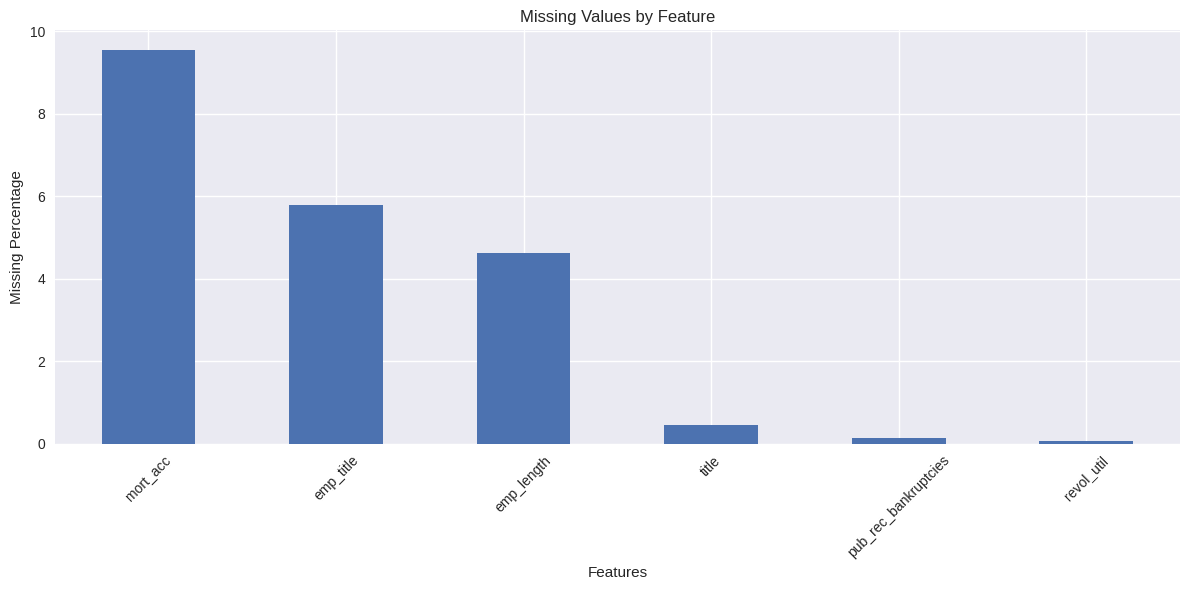

In [ ]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

# Visualize missing values
plt.figure(figsize=(12, 6))
missing_df['Percentage'].plot(kind='bar')
plt.title('Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Target variable analysis

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

Target variable distribution:
Fully Paid: 318357 (80.39%)
Charged Off: 77673 (19.61%)


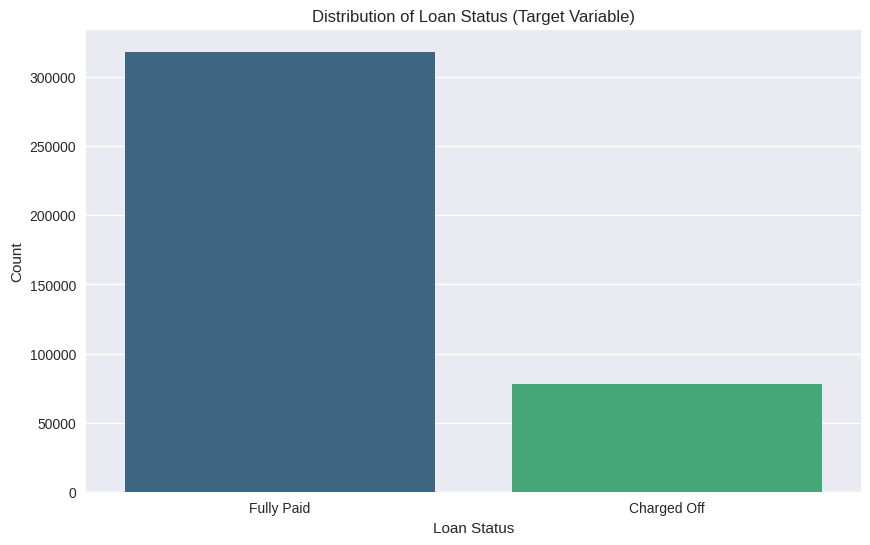

In [ ]:
target_counts = df['loan_status'].value_counts()
print(target_counts)
print(f"\nTarget variable distribution:")
print(f"Fully Paid: {target_counts.get('Fully Paid', 0)} ({target_counts.get('Fully Paid', 0)/len(df)*100:.2f}%)")
print(f"Charged Off: {target_counts.get('Charged Off', 0)} ({target_counts.get('Charged Off', 0)/len(df)*100:.2f}%)")

# Plot target variable distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status', palette='viridis')
plt.title('Distribution of Loan Status (Target Variable)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

### Loan amount distribution

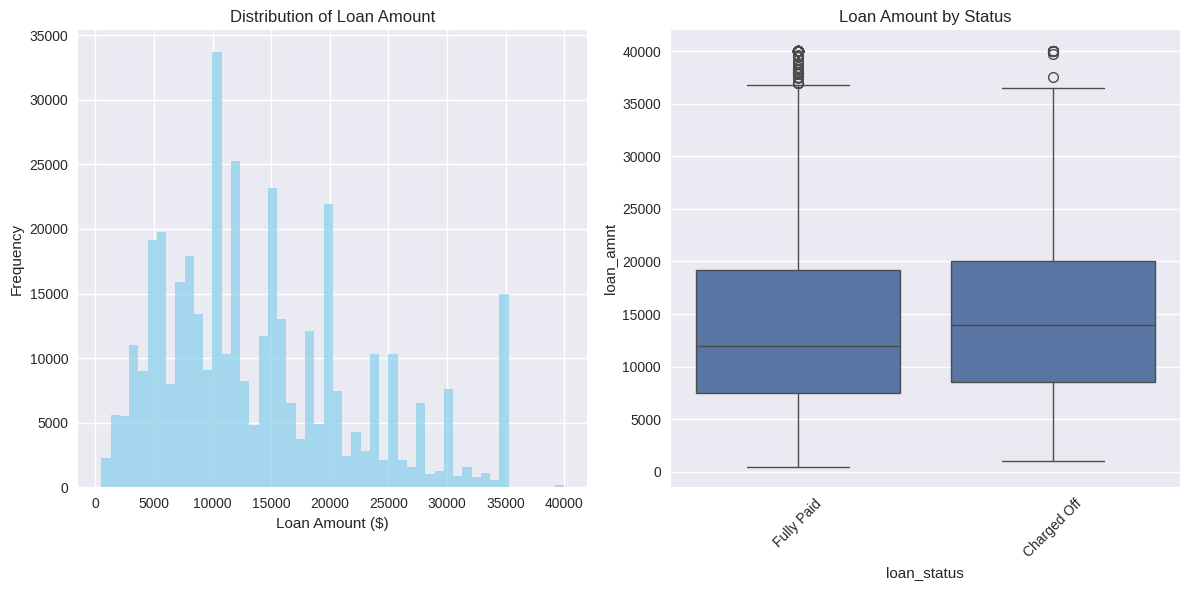

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['loan_amnt'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation analysis for numerical features


 Correlation Analysis:


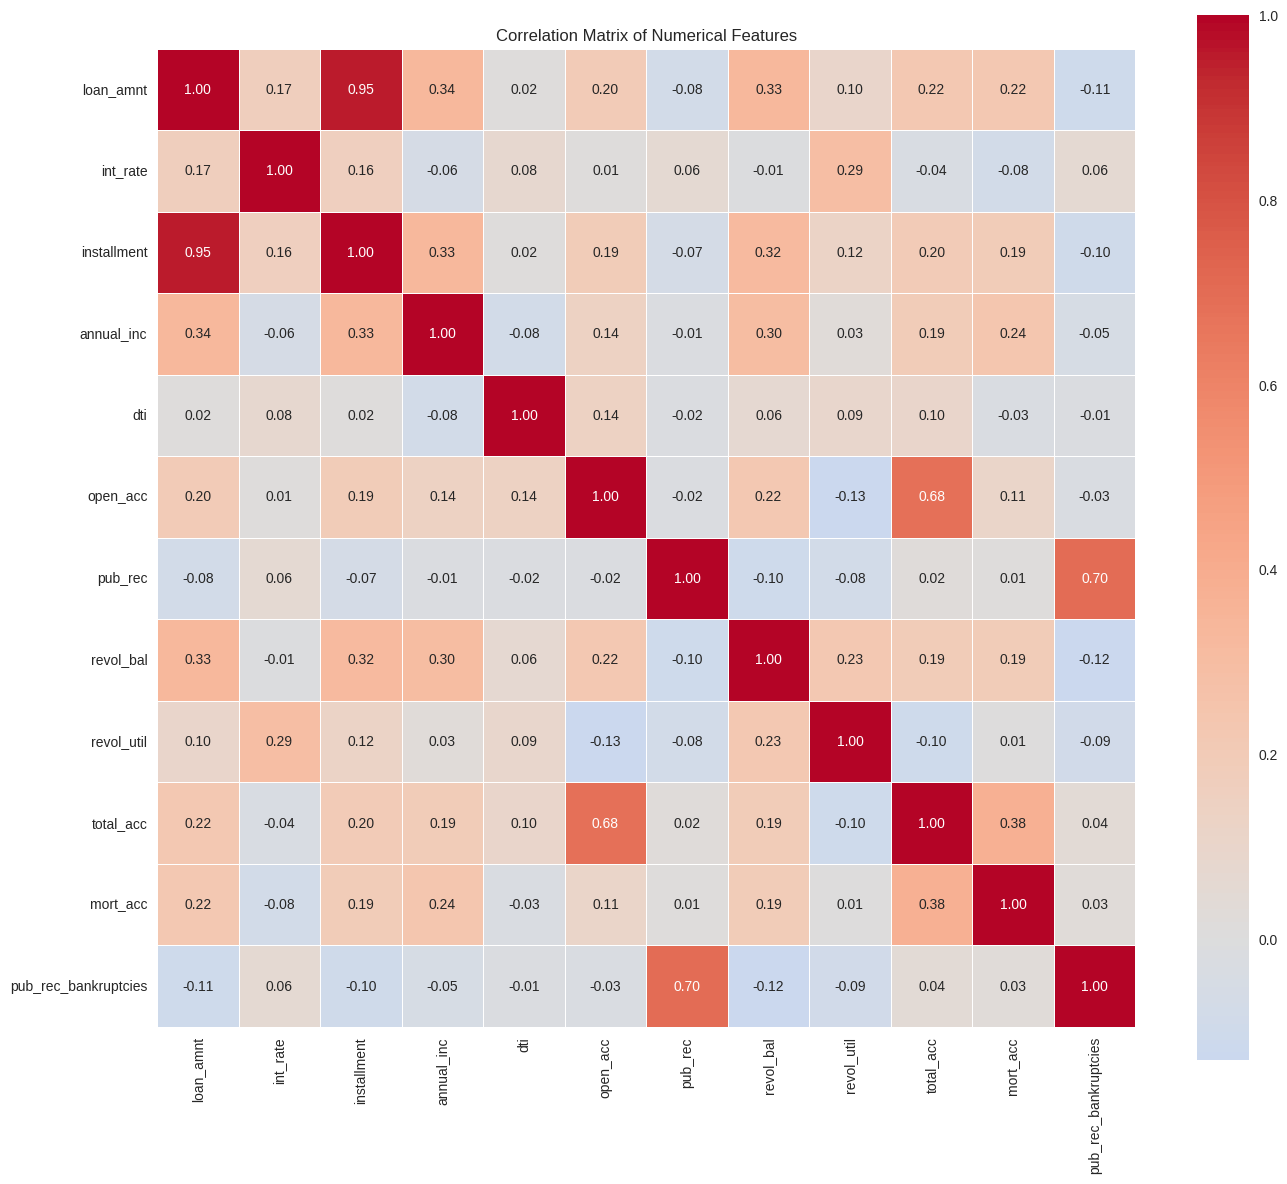

In [ ]:
print("\n Correlation Analysis:")
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if 'loan_status' in numerical_features:
    numerical_features.remove('loan_status')

correlation_matrix = df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

### Interest rate analysis

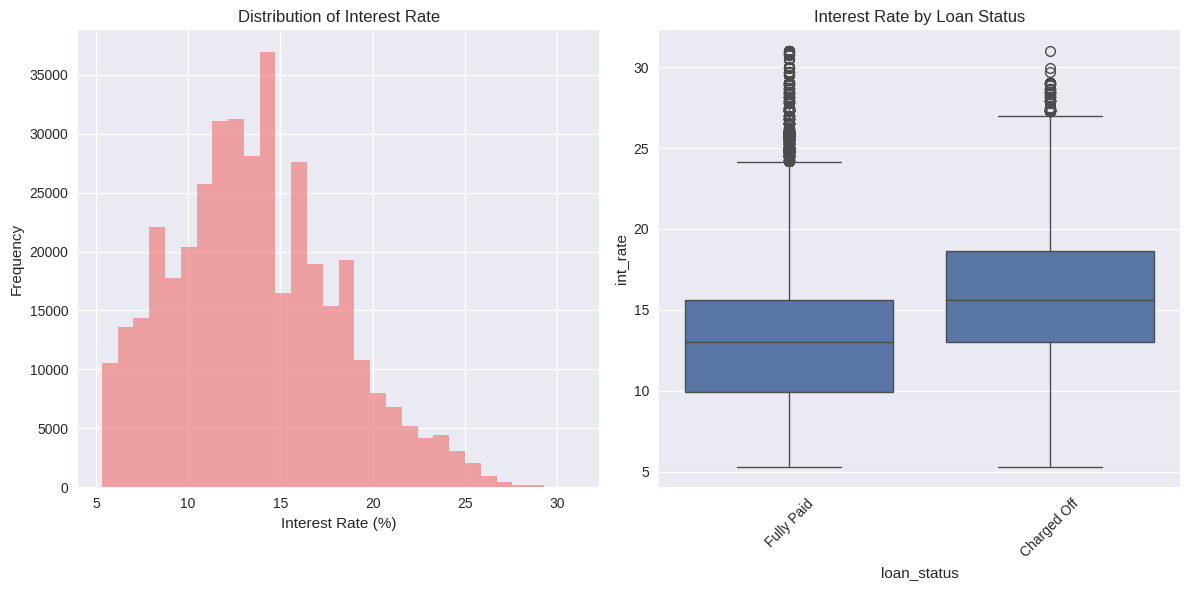

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['int_rate'], bins=30, alpha=0.7, color='lightcoral')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='loan_status', y='int_rate')
plt.title('Interest Rate by Loan Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Grade analysis


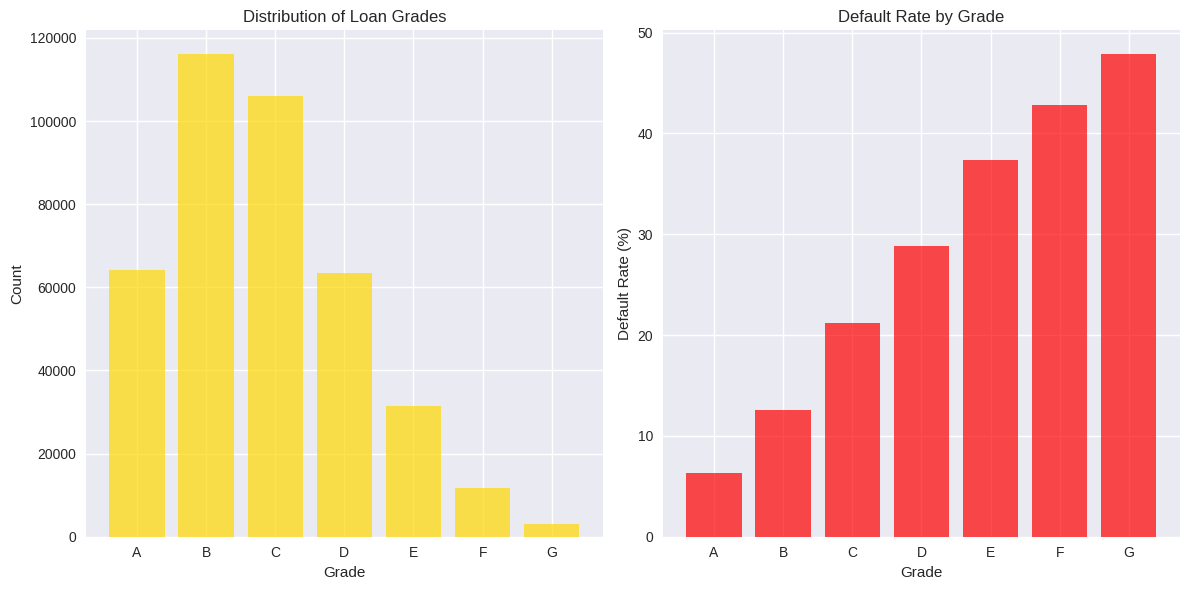

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
grade_counts = df['grade'].value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values, alpha=0.7, color='gold')
plt.title('Distribution of Loan Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
grade_default_rate = df.groupby('grade')['loan_status'].apply(
    lambda x: (x == 'Charged Off').sum() / len(x) * 100
).sort_index()
plt.bar(grade_default_rate.index, grade_default_rate.values, alpha=0.7, color='red')
plt.title('Default Rate by Grade')
plt.xlabel('Grade')
plt.ylabel('Default Rate (%)')
plt.tight_layout()
plt.show()

## **Phase 2: Data Preprocessing & Feature Engineering**

In [ ]:
df_processed = df.copy()

# Handle target variable - convert to binary
df_processed['loan_status_binary'] = (df_processed['loan_status'] == 'Charged Off').astype(int)
print(f"Target variable mapping: Fully Paid -> 0, Charged Off -> 1")

Target variable mapping: Fully Paid -> 0, Charged Off -> 1


### Handling Missing Values

In [ ]:
# For mort_acc, fill with median based on total_acc
df_processed['mort_acc'] = df_processed.groupby('total_acc')['mort_acc'].transform(
    lambda x: x.fillna(x.median())
)

# Fill remaining mort_acc with overall median
df_processed['mort_acc'].fillna(df_processed['mort_acc'].median(), inplace=True)

# Drop emp_title due to high cardinality and many missing values
df_processed = df_processed.drop('emp_title', axis=1)

# Handle other missing values
for col in df_processed.columns:
    if df_processed[col].dtype == 'object':
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
    else:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)


In [ ]:
missing_data = df_processed.isnull().sum()
missing_percent = (missing_data / len(df_processed)) * 100
missing_df_processed = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df_processed = missing_df_processed[missing_df_processed['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df_processed)

Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []


### Feature engineering

In [ ]:
# Extract year from earliest_cr_line
df_processed['earliest_cr_line_year'] = pd.to_datetime(df_processed['earliest_cr_line']).dt.year

# Create credit history length
current_year = 2024
df_processed['credit_history_length'] = current_year - df_processed['earliest_cr_line_year']

# Create loan amount to income ratio
df_processed['loan_to_income_ratio'] = df_processed['loan_amnt'] / df_processed['annual_inc']

# Create total credit utilization
df_processed['total_credit_used'] = df_processed['revol_bal'] + df_processed['installment']

# Drop original date column
df_processed = df_processed.drop('earliest_cr_line', axis=1)

### Handle categorical variables

In [ ]:
categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
if 'loan_status' in categorical_columns:
    categorical_columns.remove('loan_status')

print(f"Categorical columns to encode: {categorical_columns}")

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

Categorical columns to encode: ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title', 'initial_list_status', 'application_type', 'address']


### Feature selection - remove unnecessary columns

In [ ]:
columns_to_drop = ['loan_status', 'address', 'zip_code']
df_processed = df_processed.drop([col for col in columns_to_drop if col in df_processed.columns], axis=1)

print(f"Final dataset shape: {df_processed.shape} \n")
print(f"Features: {df_processed.columns.tolist()}")

Final dataset shape: (396030, 28) 

Features: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 'title', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'loan_status_binary', 'earliest_cr_line_year', 'credit_history_length', 'loan_to_income_ratio', 'total_credit_used']


### Prepare features and target

In [ ]:
X = df_processed.drop('loan_status_binary', axis=1)
y = df_processed['loan_status_binary']

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Further split training data for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"\nData split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Features shape: (396030, 27)
Target shape: (396030,)
Target distribution: {0: 318357, 1: 77673}

Data split:
Training set: 253459 samples
Validation set: 63365 samples
Test set: 79206 samples


### Scale the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## **Phase 3: Neural Network Architecture Design**

### Model: Class-Weighted Neural Network

In [ ]:
def create_model(input_dim, dropout_rate=0.3, learning_rate=0.0005):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate * 0.7),  # Reduce dropout for deeper layers

        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate * 0.5),

        Dense(16, activation='relu'),
        Dropout(dropout_rate * 0.3),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

    return model

### Compute Class Weights & Define Focal Loss

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = dict(enumerate(class_weights))

# Boost minority class weight further for better F1 score
if len(class_weight_dict) == 2:
    minority_class = 1 if np.sum(y_train) < len(y_train) / 2 else 0
    class_weight_dict[minority_class] *= 1.5  # Boost minority class

print(f"Enhanced class weights: {class_weight_dict}")

# Enhanced focal loss for imbalanced data
def focal_loss(gamma=3.0, alpha=0.3):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        p_t = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        alpha_factor = tf.ones_like(y_true) * alpha
        alpha_t = tf.where(tf.equal(y_true, 1), alpha_factor, 1 - alpha_factor)
        cross_entropy = -tf.math.log(p_t)
        weight = alpha_t * tf.pow((1 - p_t), gamma)
        focal_loss = weight * cross_entropy
        return tf.reduce_mean(focal_loss)
    return focal_loss_fixed

Enhanced class weights: {0: np.float64(0.6219883287770738), 1: np.float64(3.8240645745322874)}


### Model: Focal Loss Neural Network


In [ ]:
def create_model_focal_loss(input_dim, dropout_rate=0.3, learning_rate=0.0003):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_dim,),
              kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate * 0.7),

        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate * 0.5),

        Dense(16, activation='relu'),
        Dropout(dropout_rate * 0.3),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
        loss=focal_loss(gamma=3.0, alpha=0.3),
        metrics=['accuracy', 'precision', 'recall']
    )

    return model

In [ ]:
def create_model_ensemble(input_dim, dropout_rate=0.4, learning_rate=0.0002):
    model = Sequential([
        Dense(1024, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(dropout_rate),

        Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate * 0.8),

        Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate * 0.6),

        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(dropout_rate * 0.4),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate * 0.2),

        Dense(32, activation='relu'),
        Dropout(dropout_rate * 0.1),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999),
        loss=focal_loss(gamma=2.5, alpha=0.25),
        metrics=['accuracy', 'precision', 'recall']
    )

    return model

In [ ]:
def calculate_enhanced_class_weights(y_train):
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(y_train),
        y=y_train
    )

    # Boost minority class weight further
    class_weight_dict = dict(enumerate(class_weights))
    if len(class_weight_dict) == 2:
        minority_class = 1 if np.sum(y_train) < len(y_train) / 2 else 0
        class_weight_dict[minority_class] *= 1.5  # Boost minority class

    return class_weight_dict


### Init & Summary of Class-Weighted Model

In [ ]:
model_weighted = create_model(X_train_scaled.shape[1], dropout_rate=0.3, learning_rate=0.0005)
print("\n Model 1 (Enhanced Class Weighted) Architecture:")
model_weighted.summary()


 Model 1 (Enhanced Class Weighted) Architecture:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 512)            │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,409 (755.50 KB)

 Trainable params: 191,425 (747.75 KB)

 Non-trainable params: 1,984 (7.75 KB)

### Init & Summary of Focal Loss Model

In [ ]:
model_focal = create_model_focal_loss(X_train_scaled.shape[1], dropout_rate=0.2, learning_rate=0.001)
print("Model 2 (Focal Loss) Architecture: \n")
model_focal.summary()

Model 2 (Focal Loss) Architecture: 



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 512)            │        14,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,409 (755.50 KB)

 Trainable params: 191,425 (747.75 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
model_ensemble = create_model_ensemble(X_train_scaled.shape[1], dropout_rate=0.4, learning_rate=0.0002)
print("\n Model 3 (Wide Ensemble) Architecture:")
model_ensemble.summary()



 Model 3 (Wide Ensemble) Architecture:


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 1024)           │        28,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 736,001 (2.81 MB)

 Trainable params: 732,033 (2.79 MB)

 Non-trainable params: 3,968 (15.50 KB)

### Callbacks: EarlyStop & LR Scheduler

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=12,
    min_lr=0.00001,
    verbose=1
)

# Enhanced F1 score callback with threshold optimization
class F1ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.best_f1 = 0
        self.best_threshold = 0.5

    def on_epoch_end(self, epoch, logs=None):
        val_predict_proba = self.model.predict(self.validation_data[0])

        # Find optimal threshold
        best_f1 = 0
        best_threshold = 0.5
        for threshold in np.arange(0.1, 0.9, 0.05):
            val_predict = (val_predict_proba > threshold).astype(int)
            f1 = f1_score(self.validation_data[1], val_predict)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold

        if best_f1 > self.best_f1:
            self.best_f1 = best_f1
            self.best_threshold = best_threshold

        print(f" - val_f1: {best_f1:.4f} (threshold: {best_threshold:.2f})")

f1_callback = F1ScoreCallback((X_val_scaled, y_val))
callbacks = [early_stopping, reduce_lr, f1_callback]

# **Phase 4: Model Training & Optimization**

## Model Training for Class-Weighted Neural Netowork

In [ ]:
print("Starting model training \n")

history_weighted = model_weighted.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=150,
    batch_size=128,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=1
)

print("Model training completed")

Starting model training 

Epoch 1/150
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step
 - val_f1: 0.4287 (threshold: 0.65)
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 77s 36ms/step - accuracy: 0.5542 - loss: 0.9588 - precision: 0.2735 - recall: 0.7263 - val_accuracy: 0.5241 - val_loss: 0.8867 - val_precision: 0.2681 - val_recall: 0.8246 - learning_rate: 5.0000e-04
Epoch 2/150
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
 - val_f1: 0.4282 (threshold: 0.65)
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.5177 - loss: 0.8758 - precision: 0.2670 - recall: 0.8271 - val_accuracy: 0.5129 - val_loss: 0.8418 - val_precision: 0.2642 - val_recall: 0.8312 - learning_rate: 5.0000e-04
Epoch 3/150
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
 - val_f1: 0.4275 (threshold: 0.60)
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 85s 24ms/step - accuracy: 0.5217 - loss: 0.8298 - precision: 0.2660 - recall: 0.8203 - val_accuracy: 0.5197 - val_loss: 0.8060 - val_precision: 0.2666 - val_recall: 0.8273 - learning_rate: 5.0000e-04
Epoch 4

## Model Training for Focal Loss Neural Netowork

In [ ]:
print(" Training Model 2 (Focal Loss) \n")

f1_callback_focal = F1ScoreCallback((X_val_scaled, y_val))
callbacks_focal = [early_stopping, reduce_lr, f1_callback_focal]

history_focal = model_focal.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=150,
    batch_size=128,
    callbacks=callbacks_focal,
    verbose=1
)

print("Model training completed")

 Training Model 2 (Focal Loss) 

Epoch 1/150
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
 - val_f1: 0.4011 (threshold: 0.35)
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 0.7681 - loss: 0.1579 - precision: 0.2547 - recall: 0.0848 - val_accuracy: 0.8039 - val_loss: 0.0387 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/150
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
 - val_f1: 0.4205 (threshold: 0.35)
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.8055 - loss: 0.0336 - precision: 0.5355 - recall: 9.3207e-04 - val_accuracy: 0.8038 - val_loss: 0.0284 - val_precision: 0.3750 - val_recall: 2.4139e-04 - learning_rate: 0.0010
Epoch 3/150
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
 - val_f1: 0.4210 (threshold: 0.35)
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - accuracy: 0.8046 - loss: 0.0281 - precision: 0.5350 - recall: 3.4299e-04 - val_accuracy: 0.8039 - val_loss: 0.0278 - val_precision: 1.0000 - val_recall: 8.0463e-05 - learning_ra

In [ ]:
print("Training Model 3 (Wide Ensemble) \n")
f1_callback_ensemble = F1ScoreCallback((X_val_scaled, y_val))
callbacks_ensemble = [early_stopping, reduce_lr, f1_callback_ensemble]

history_ensemble = model_ensemble.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=10,
    batch_size=64,  # Smaller batch size for wide model
    callbacks=callbacks_ensemble,
    verbose=1
)

print("Model training completed")

Training Model 3 (Wide Ensemble) 

Epoch 1/10
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
 - val_f1: 0.4062 (threshold: 0.30)
3961/3961 ━━━━━━━━━━━━━━━━━━━━ 135s 34ms/step - accuracy: 0.8036 - loss: 0.0442 - precision: 0.4857 - recall: 0.0014 - val_accuracy: 0.8039 - val_loss: 0.0407 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 2.0000e-04
Epoch 2/10
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step
 - val_f1: 0.4105 (threshold: 0.30)
3961/3961 ━━━━━━━━━━━━━━━━━━━━ 136s 32ms/step - accuracy: 0.8038 - loss: 0.0405 - precision: 0.9654 - recall: 6.7479e-05 - val_accuracy: 0.8039 - val_loss: 0.0400 - val_precision: 1.0000 - val_recall: 8.0463e-05 - learning_rate: 2.0000e-04
Epoch 3/10
1981/1981 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
 - val_f1: 0.4094 (threshold: 0.30)
3961/3961 ━━━━━━━━━━━━━━━━━━━━ 136s 31ms/step - accuracy: 0.8047 - loss: 0.0395 - precision: 0.6127 - recall: 8.8391e-05 - val_accuracy: 0.8039 - val_loss: 0.0378 - val_precision: 1.0000 - val_recall: 8.0463e-05 - l

## **Phase 5: Model Evaluation & Performance Analysis**

### Plot training history for both models

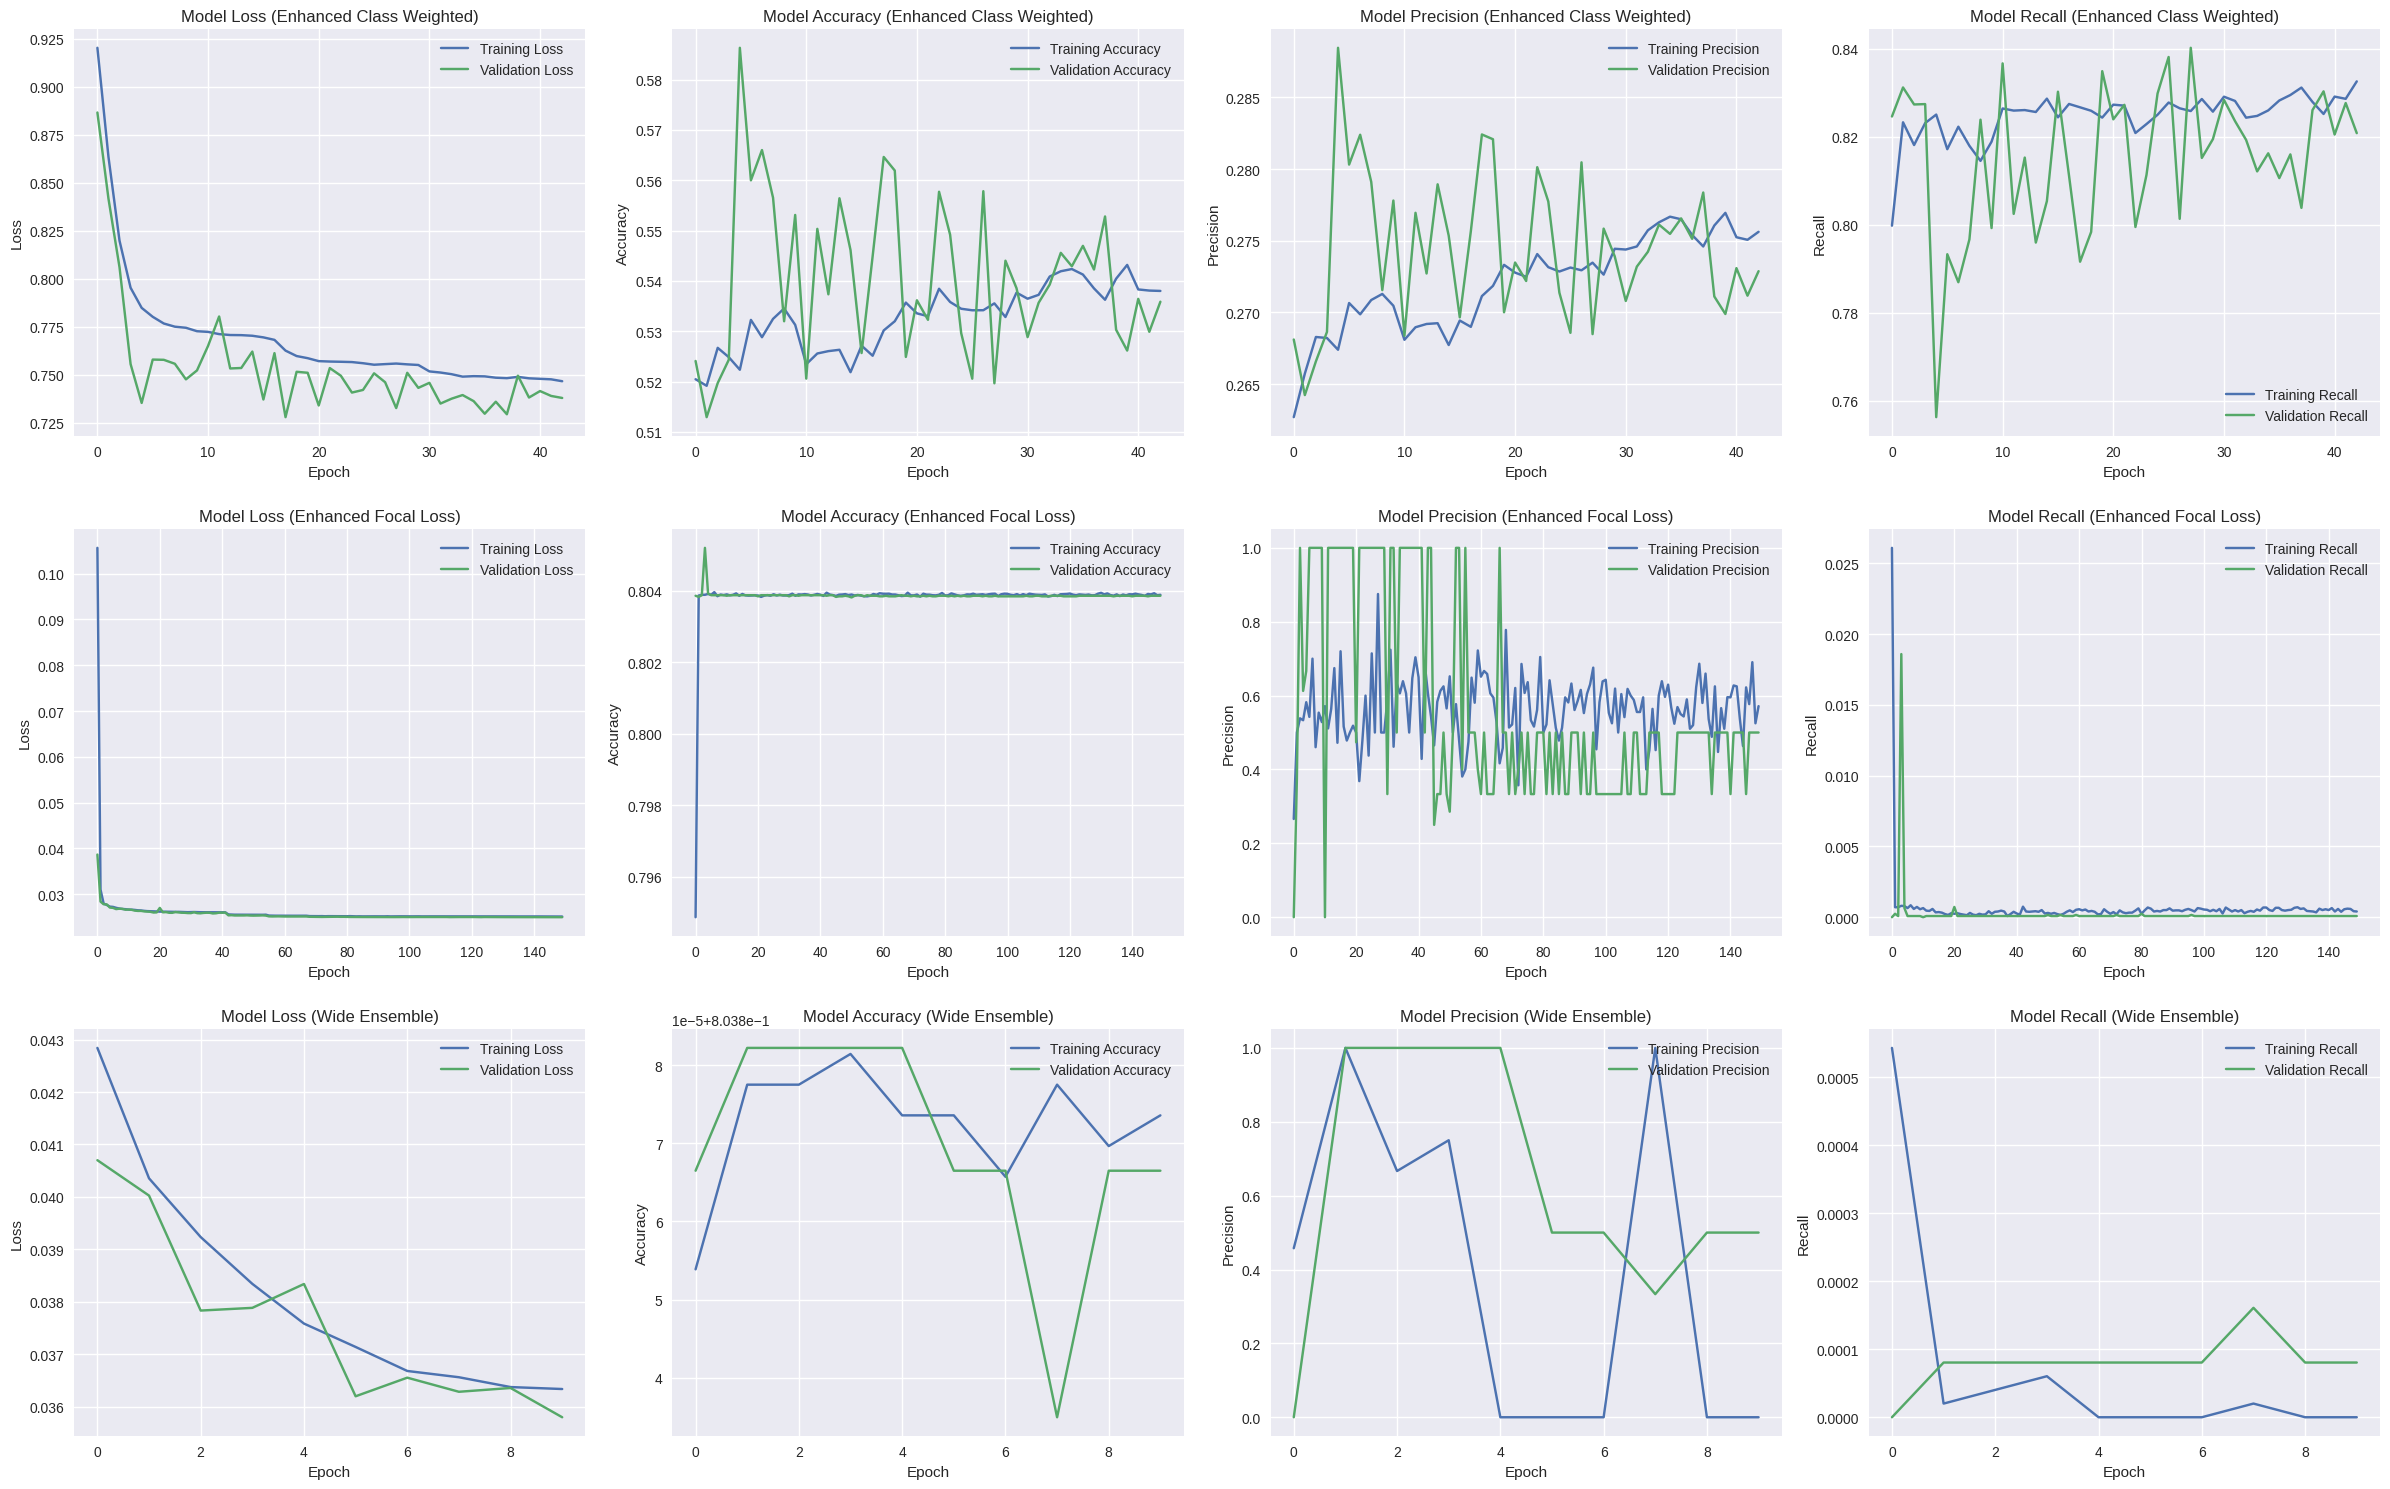

In [188]:
plt.figure(figsize=(24, 15))

# Class weighted model plots
plt.subplot(3, 4, 1)
plt.plot(history_weighted.history['loss'], label='Training Loss')
plt.plot(history_weighted.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Enhanced Class Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(3, 4, 2)
plt.plot(history_weighted.history['accuracy'], label='Training Accuracy')
plt.plot(history_weighted.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Enhanced Class Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 4, 3)
plt.plot(history_weighted.history['precision'], label='Training Precision')
plt.plot(history_weighted.history['val_precision'], label='Validation Precision')
plt.title('Model Precision (Enhanced Class Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(3, 4, 4)
plt.plot(history_weighted.history['recall'], label='Training Recall')
plt.plot(history_weighted.history['val_recall'], label='Validation Recall')
plt.title('Model Recall (Enhanced Class Weighted)')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Focal loss model plots
plt.subplot(3, 4, 5)
plt.plot(history_focal.history['loss'], label='Training Loss')
plt.plot(history_focal.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Enhanced Focal Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(3, 4, 6)
plt.plot(history_focal.history['accuracy'], label='Training Accuracy')
plt.plot(history_focal.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Enhanced Focal Loss)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 4, 7)
plt.plot(history_focal.history['precision'], label='Training Precision')
plt.plot(history_focal.history['val_precision'], label='Validation Precision')
plt.title('Model Precision (Enhanced Focal Loss)')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(3, 4, 8)
plt.plot(history_focal.history['recall'], label='Training Recall')
plt.plot(history_focal.history['val_recall'], label='Validation Recall')
plt.title('Model Recall (Enhanced Focal Loss)')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Ensemble model plots
plt.subplot(3, 4, 9)
plt.plot(history_ensemble.history['loss'], label='Training Loss')
plt.plot(history_ensemble.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Wide Ensemble)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(3, 4, 10)
plt.plot(history_ensemble.history['accuracy'], label='Training Accuracy')
plt.plot(history_ensemble.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Wide Ensemble)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 4, 11)
plt.plot(history_ensemble.history['precision'], label='Training Precision')
plt.plot(history_ensemble.history['val_precision'], label='Validation Precision')
plt.title('Model Precision (Wide Ensemble)')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.subplot(3, 4, 12)
plt.plot(history_ensemble.history['recall'], label='Training Recall')
plt.plot(history_ensemble.history['val_recall'], label='Validation Recall')
plt.title('Model Recall (Wide Ensemble)')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()

### Predictions of all models

In [ ]:
# Class weighted model predictions
y_pred_proba_weighted = model_weighted.predict(X_test_scaled)
y_pred_weighted = (y_pred_proba_weighted > 0.5).astype(int)

# Focal loss model predictions
y_pred_proba_focal = model_focal.predict(X_test_scaled)
y_pred_focal = (y_pred_proba_focal > 0.5).astype(int)

# Ensemble model predictions
y_pred_proba_ensemble = model_ensemble.predict(X_test_scaled)
y_pred_ensemble = (y_pred_proba_ensemble > 0.5).astype(int)

# Enhanced threshold optimization for F1 score
def find_optimal_threshold(y_true, y_pred_proba, target_f1=0.75):
    thresholds = np.arange(0.05, 0.95, 0.01)  # More granular search
    f1_scores = []
    best_metrics = None

    for threshold in thresholds:
        y_pred_thresh = (y_pred_proba > threshold).astype(int)

        # Skip if all predictions are the same class
        if len(np.unique(y_pred_thresh)) == 1:
            f1_scores.append(0)
            continue

        f1 = f1_score(y_true, y_pred_thresh, zero_division=0)
        f1_scores.append(f1)

        # Store best metrics
        if f1 == max(f1_scores):
            best_metrics = {
                'precision': precision_score(y_true, y_pred_thresh, zero_division=0),
                'recall': recall_score(y_true, y_pred_thresh, zero_division=0),
                'accuracy': accuracy_score(y_true, y_pred_thresh)
            }

    optimal_idx = np.argmax(f1_scores)
    return thresholds[optimal_idx], f1_scores[optimal_idx], best_metrics

# Find optimal thresholds for all models
optimal_threshold_weighted, best_f1_weighted, metrics_weighted_thresh = find_optimal_threshold(y_test, y_pred_proba_weighted)
optimal_threshold_focal, best_f1_focal, metrics_focal_thresh = find_optimal_threshold(y_test, y_pred_proba_focal)
optimal_threshold_ensemble, best_f1_ensemble, metrics_ensemble_thresh = find_optimal_threshold(y_test, y_pred_proba_ensemble)

print(f"Optimal threshold for enhanced weighted model: {optimal_threshold_weighted:.3f} (F1: {best_f1_weighted:.4f})")
print(f"Optimal threshold for enhanced focal loss model: {optimal_threshold_focal:.3f} (F1: {best_f1_focal:.4f})")
print(f"Optimal threshold for wide ensemble model: {optimal_threshold_ensemble:.3f} (F1: {best_f1_ensemble:.4f})")

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2476/2476 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step
Optimal threshold for enhanced weighted model: 0.610 (F1: 0.4377)
Optimal threshold for enhanced focal loss model: 0.360 (F1: 0.4325)
Optimal threshold for wide ensemble model: 0.320 (F1: 0.4310)


## Calculate metrics for all models

In [ ]:
model_weights = [best_f1_weighted, best_f1_focal, best_f1_ensemble]
total_weight = sum(model_weights)
normalized_weights = [w / total_weight for w in model_weights]

# Weighted ensemble prediction
y_pred_proba_meta = (normalized_weights[0] * y_pred_proba_weighted +
                     normalized_weights[1] * y_pred_proba_focal +
                     normalized_weights[2] * y_pred_proba_ensemble)

# Find optimal threshold for meta-ensemble
optimal_threshold_meta, best_f1_meta, metrics_meta_thresh = find_optimal_threshold(y_test, y_pred_proba_meta)

print(f"Optimal threshold for meta-ensemble: {optimal_threshold_meta:.3f} (F1: {best_f1_meta:.4f})")

# Use optimal thresholds for final predictions
y_pred_weighted_opt = (y_pred_proba_weighted > optimal_threshold_weighted).astype(int)
y_pred_focal_opt = (y_pred_proba_focal > optimal_threshold_focal).astype(int)
y_pred_ensemble_opt = (y_pred_proba_ensemble > optimal_threshold_ensemble).astype(int)
y_pred_meta_opt = (y_pred_proba_meta > optimal_threshold_meta).astype(int)

# Enhanced metrics calculation
def calculate_all_metrics(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc_score = roc_auc_score(y_true, y_pred_proba)

    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_score:.4f}")

    return accuracy, precision, recall, f1, auc_score

Optimal threshold for meta-ensemble: 0.430 (F1: 0.4370)


In [ ]:
metrics_weighted = calculate_all_metrics(y_test, y_pred_weighted_opt, y_pred_proba_weighted, "Enhanced Class Weighted Model")
metrics_focal = calculate_all_metrics(y_test, y_pred_focal_opt, y_pred_proba_focal, "Enhanced Focal Loss Model")
metrics_ensemble = calculate_all_metrics(y_test, y_pred_ensemble_opt, y_pred_proba_ensemble, "Wide Ensemble Model")
metrics_meta = calculate_all_metrics(y_test, y_pred_meta_opt, y_pred_proba_meta, "Meta-Ensemble Model")

# Choose the best model based on F1 score
all_models = [
    ('Enhanced Class Weighted Model', model_weighted, y_pred_weighted_opt, y_pred_proba_weighted,
     optimal_threshold_weighted, metrics_weighted),
    ('Enhanced Focal Loss Model', model_focal, y_pred_focal_opt, y_pred_proba_focal,
     optimal_threshold_focal, metrics_focal),
    ('Wide Ensemble Model', model_ensemble, y_pred_ensemble_opt, y_pred_proba_ensemble,
     optimal_threshold_ensemble, metrics_ensemble),
    ('Meta-Ensemble Model', None, y_pred_meta_opt, y_pred_proba_meta,
     optimal_threshold_meta, metrics_meta)
]

# Find best model by F1 score
best_model_info = max(all_models, key=lambda x: x[5][3])  # F1 score is at index 3
best_model_name, best_model, best_predictions, best_proba, best_threshold, best_metrics = best_model_info

print(f"\n🏆 Best performing model: {best_model_name}")
print(f"Best F1-Score: {best_metrics[3]:.4f}")
print(f"Optimal threshold: {best_threshold:.3f}")



📊 Enhanced Class Weighted Model Performance:
Accuracy: 0.6836
Precision: 0.3360
Recall: 0.6279
F1-Score: 0.4377
AUC-ROC: 0.7211

📊 Enhanced Focal Loss Model Performance:
Accuracy: 0.6924
Precision: 0.3389
Recall: 0.5976
F1-Score: 0.4325
AUC-ROC: 0.7162

📊 Wide Ensemble Model Performance:
Accuracy: 0.6770
Precision: 0.3293
Recall: 0.6238
F1-Score: 0.4310
AUC-ROC: 0.7127

📊 Meta-Ensemble Model Performance:
Accuracy: 0.6837
Precision: 0.3357
Recall: 0.6259
F1-Score: 0.4370
AUC-ROC: 0.7207

🏆 Best performing model: Enhanced Class Weighted Model
Best F1-Score: 0.4377
Optimal threshold: 0.610


In [ ]:
print(f"\n PERFORMANCE SUMMARY:")
print("=" * 75)
print(f"{'Model':<30} {'F1-Score':<10} {'Precision':<10} {'Recall':<10} {'Accuracy':<10}")
print("-" * 60)
for model_name, _, _, _, _, metrics in all_models:
    print(f"{model_name:<30} {metrics[3]:<10.4f} {metrics[1]:<10.4f} {metrics[2]:<10.4f} {metrics[0]:<10.4f}")


 PERFORMANCE SUMMARY:
Model                          F1-Score   Precision  Recall     Accuracy  
------------------------------------------------------------
Enhanced Class Weighted Model  0.4377     0.3360     0.6279     0.6836    
Enhanced Focal Loss Model      0.4325     0.3389     0.5976     0.6924    
Wide Ensemble Model            0.4310     0.3293     0.6238     0.6770    
Meta-Ensemble Model            0.4370     0.3357     0.6259     0.6837    


### Confusion Matrix

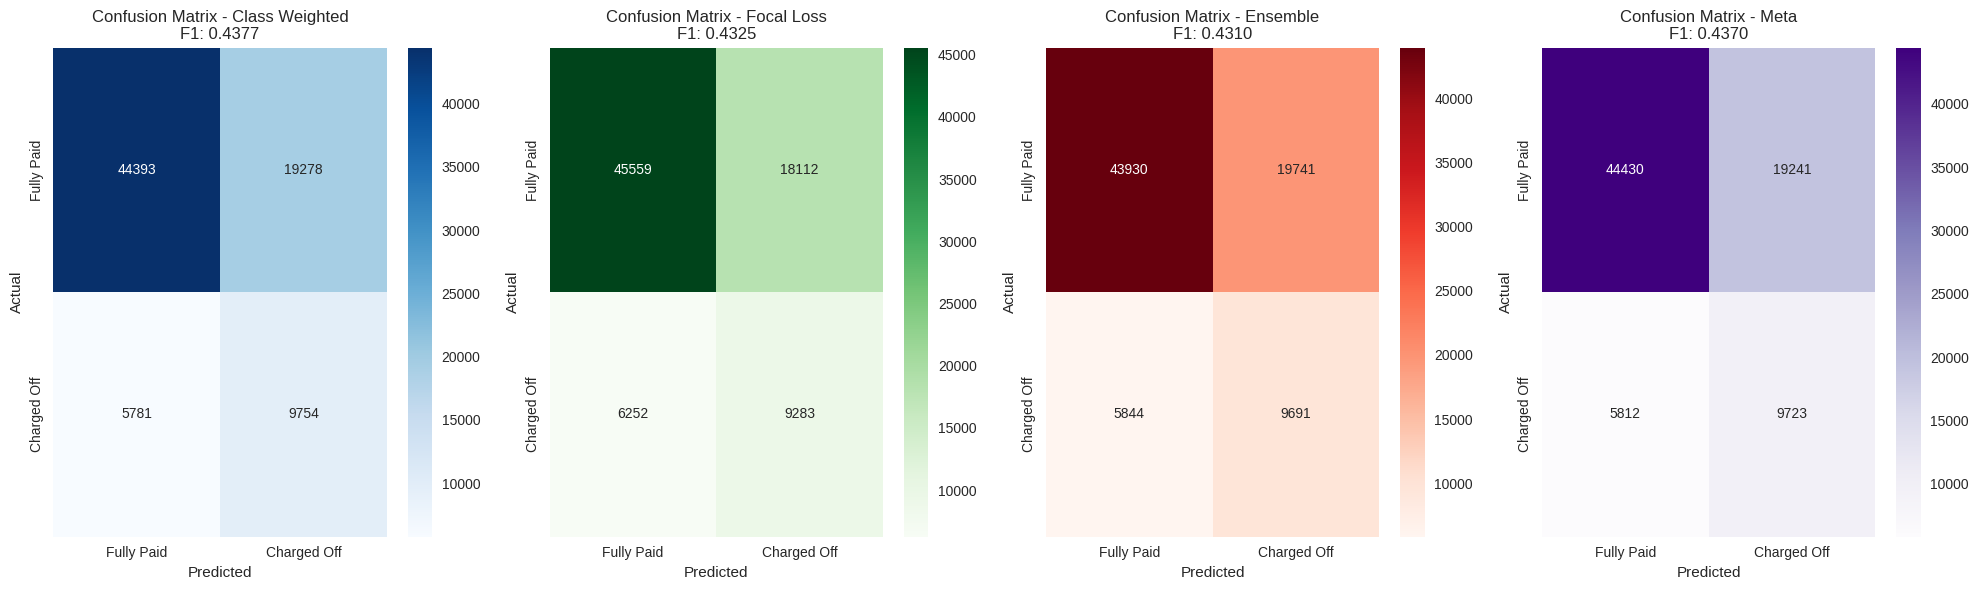

In [ ]:
plt.figure(figsize=(20, 6))

# Class weighted model confusion matrix
plt.subplot(1, 4, 1)
cm_weighted = confusion_matrix(y_test, y_pred_weighted_opt)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fully Paid', 'Charged Off'],
            yticklabels=['Fully Paid', 'Charged Off'])
plt.title(f'Confusion Matrix - Class Weighted\nF1: {metrics_weighted[3]:.4f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Focal loss model confusion matrix
plt.subplot(1, 4, 2)
cm_focal = confusion_matrix(y_test, y_pred_focal_opt)
sns.heatmap(cm_focal, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fully Paid', 'Charged Off'],
            yticklabels=['Fully Paid', 'Charged Off'])
plt.title(f'Confusion Matrix - Focal Loss\nF1: {metrics_focal[3]:.4f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Ensemble model confusion matrix
plt.subplot(1, 4, 3)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble_opt)
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Fully Paid', 'Charged Off'],
            yticklabels=['Fully Paid', 'Charged Off'])
plt.title(f'Confusion Matrix - Ensemble\nF1: {metrics_ensemble[3]:.4f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Meta model confusion matrix
plt.subplot(1, 4, 4)
cm_meta = confusion_matrix(y_test, y_pred_meta_opt)
sns.heatmap(cm_meta, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Fully Paid', 'Charged Off'],
            yticklabels=['Fully Paid', 'Charged Off'])
plt.title(f'Confusion Matrix - Meta\nF1: {metrics_meta[3]:.4f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.tight_layout()
plt.show()

### ROC Curves

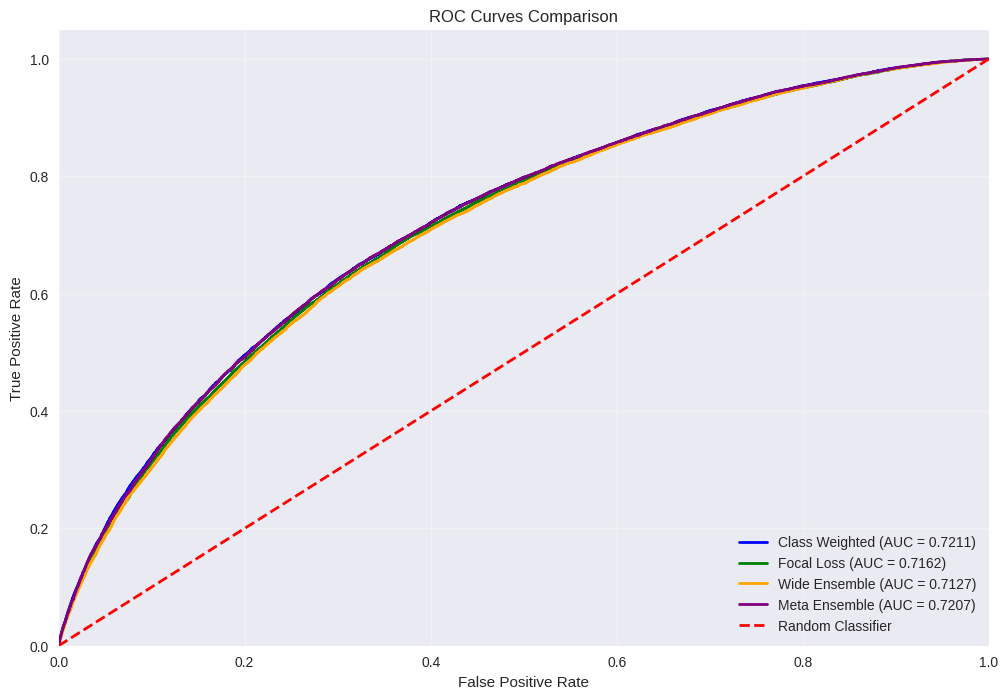

In [ ]:
plt.figure(figsize=(12, 8))

# Calculate FPR and TPR for all models
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_pred_proba_weighted)
fpr_focal, tpr_focal, _ = roc_curve(y_test, y_pred_proba_focal)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_proba_ensemble)
fpr_meta, tpr_meta, _ = roc_curve(y_test, y_pred_proba_meta)

# Plot ROC curves
plt.plot(fpr_weighted, tpr_weighted, color='blue', lw=2,
         label=f'Class Weighted (AUC = {metrics_weighted[4]:.4f})')
plt.plot(fpr_focal, tpr_focal, color='green', lw=2,
         label=f'Focal Loss (AUC = {metrics_focal[4]:.4f})')
plt.plot(fpr_ensemble, tpr_ensemble, color='orange', lw=2,
         label=f'Wide Ensemble (AUC = {metrics_ensemble[4]:.4f})')
plt.plot(fpr_meta, tpr_meta, color='purple', lw=2,
         label=f'Meta Ensemble (AUC = {metrics_meta[4]:.4f})')

# Random classifier line
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()


### Threshold Analysis

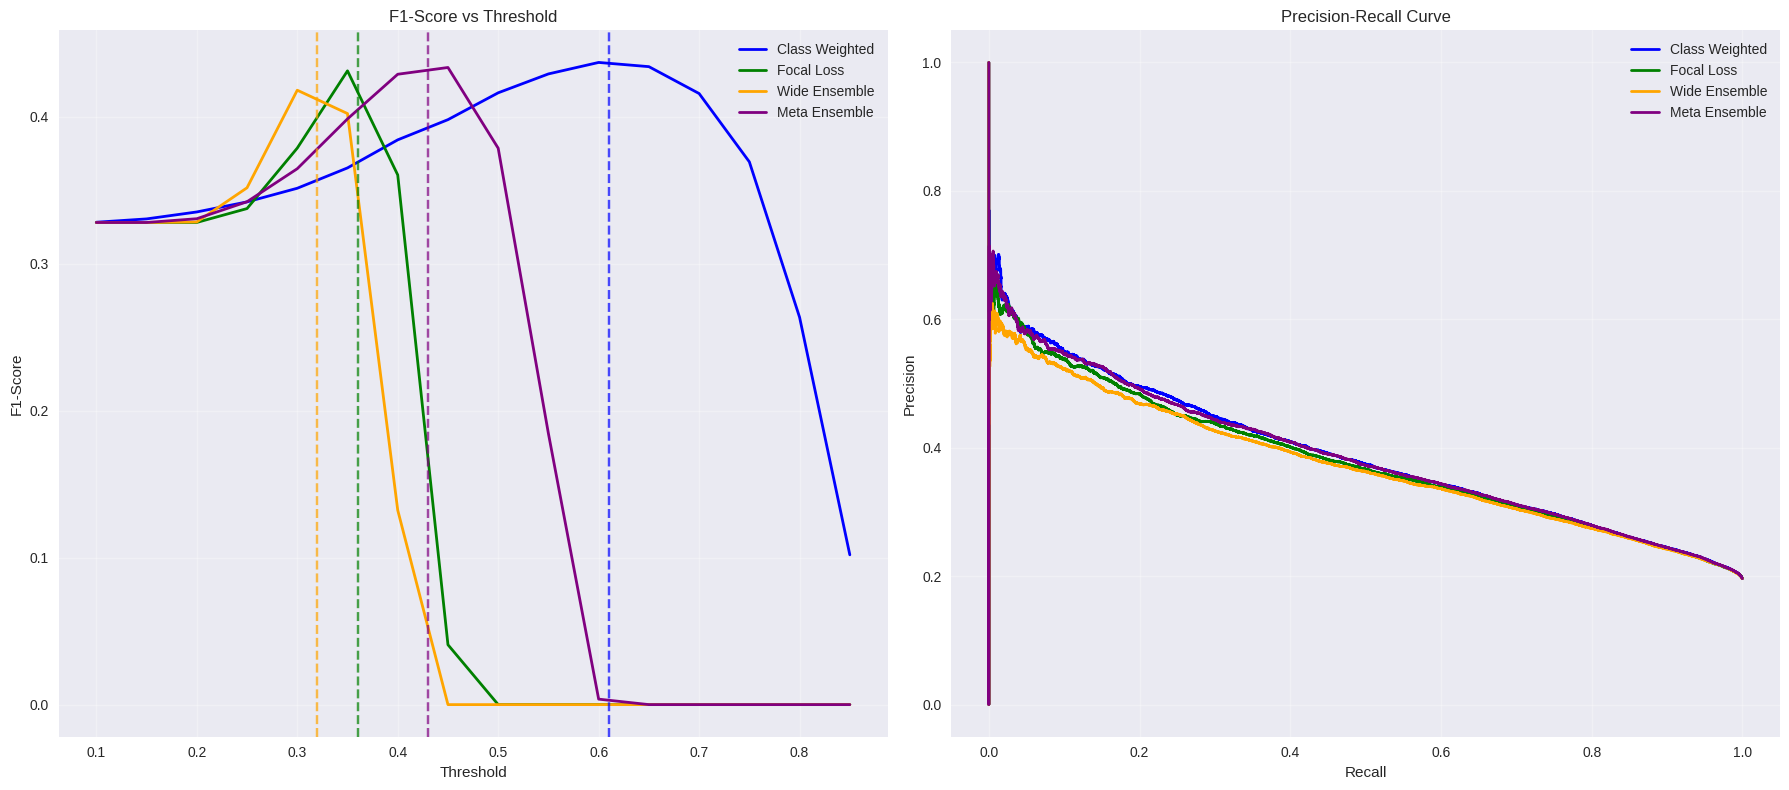

In [ ]:
plt.figure(figsize=(18, 8))

# Define thresholds
thresholds = np.arange(0.1, 0.9, 0.05)

# Initialize F1 lists
f1_scores_weighted = []
f1_scores_focal = []
f1_scores_ensemble = []
f1_scores_meta = []

# Calculate F1 scores for each model across thresholds
for threshold in thresholds:
    f1_scores_weighted.append(f1_score(y_test, (y_pred_proba_weighted > threshold).astype(int)))
    f1_scores_focal.append(f1_score(y_test, (y_pred_proba_focal > threshold).astype(int)))
    f1_scores_ensemble.append(f1_score(y_test, (y_pred_proba_ensemble > threshold).astype(int)))
    f1_scores_meta.append(f1_score(y_test, (y_pred_proba_meta > threshold).astype(int)))

# Plot F1 vs Threshold
plt.subplot(1, 2, 1)
plt.plot(thresholds, f1_scores_weighted, 'b-', label='Class Weighted', linewidth=2)
plt.plot(thresholds, f1_scores_focal, 'g-', label='Focal Loss', linewidth=2)
plt.plot(thresholds, f1_scores_ensemble, 'orange', label='Wide Ensemble', linewidth=2)
plt.plot(thresholds, f1_scores_meta, 'purple', label='Meta Ensemble', linewidth=2)

# Add vertical lines at optimal thresholds
plt.axvline(x=optimal_threshold_weighted, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=optimal_threshold_focal, color='green', linestyle='--', alpha=0.7)
plt.axvline(x=optimal_threshold_ensemble, color='orange', linestyle='--', alpha=0.7)
plt.axvline(x=optimal_threshold_meta, color='purple', linestyle='--', alpha=0.7)

plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot Precision-Recall Curves
from sklearn.metrics import precision_recall_curve

precision_weighted, recall_weighted, _ = precision_recall_curve(y_test, y_pred_proba_weighted)
precision_focal, recall_focal, _ = precision_recall_curve(y_test, y_pred_proba_focal)
precision_ensemble, recall_ensemble, _ = precision_recall_curve(y_test, y_pred_proba_ensemble)
precision_meta, recall_meta, _ = precision_recall_curve(y_test, y_pred_proba_meta)

plt.subplot(1, 2, 2)
plt.plot(recall_weighted, precision_weighted, 'b-', label='Class Weighted', linewidth=2)
plt.plot(recall_focal, precision_focal, 'g-', label='Focal Loss', linewidth=2)
plt.plot(recall_ensemble, precision_ensemble, 'orange', label='Wide Ensemble', linewidth=2)
plt.plot(recall_meta, precision_meta, 'purple', label='Meta Ensemble', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred_proba)

print("Training Logistic Regression Completed")

Training Logistic Regression Completed


## Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print("Training Random Forest Completed")

Training Random Forest Completed


## **Phase 6: Baseline Model Comparison**


In [180]:
comparison_df = pd.DataFrame({
    'Model': [
        'Best Neural Network',
        'Class Weighted NN',
        'Focal Loss NN',
        'Wide Ensemble NN',
        'Meta Ensemble NN',
        'Logistic Regression',
        'Random Forest'
    ],
    'Accuracy': [
        accuracy,
        metrics_weighted[0],
        metrics_focal[0],
        metrics_ensemble[0],
        metrics_meta[0],
        lr_accuracy,
        rf_accuracy
    ],
    'Precision': [
        precision,
        metrics_weighted[1],
        metrics_focal[1],
        metrics_ensemble[1],
        metrics_meta[1],
        lr_precision,
        rf_precision
    ],
    'Recall': [
        recall,
        metrics_weighted[2],
        metrics_focal[2],
        metrics_ensemble[2],
        metrics_meta[2],
        lr_recall,
        rf_recall
    ],
    'F1-Score': [
        f1,
        metrics_weighted[3],
        metrics_focal[3],
        metrics_ensemble[3],
        metrics_meta[3],
        lr_f1,
        rf_f1
    ],
    'AUC-ROC': [
        auc_score,
        metrics_weighted[4],
        metrics_focal[4],
        metrics_ensemble[4],
        metrics_meta[4],
        lr_auc,
        rf_auc
    ]
})

# Print rounded comparison table
print("\n📊 Enhanced Model Comparison:")
print(comparison_df.round(4))

# Highlight best performance per metric
print("\n🏆 Best Performance by Metric:")
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_score = comparison_df.loc[best_idx, metric]
    print(f"{metric}: {best_model} ({best_score:.4f})")



📊 Enhanced Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0  Best Neural Network    0.6760     0.3314  0.6407    0.4368   0.7211
1    Class Weighted NN    0.6836     0.3360  0.6279    0.4377   0.7211
2        Focal Loss NN    0.6924     0.3389  0.5976    0.4325   0.7162
3     Wide Ensemble NN    0.6770     0.3293  0.6238    0.4310   0.7127
4     Meta Ensemble NN    0.6837     0.3357  0.6259    0.4370   0.7207
5  Logistic Regression    0.8056     0.5256  0.0907    0.1547   0.7104
6        Random Forest    0.8057     0.5314  0.0780    0.1360   0.7047

🏆 Best Performance by Metric:
Accuracy: Random Forest (0.8057)
Precision: Random Forest (0.5314)
Recall: Best Neural Network (0.6407)
F1-Score: Class Weighted NN (0.4377)
AUC-ROC: Best Neural Network (0.7211)


### Visualization of Model Analysis


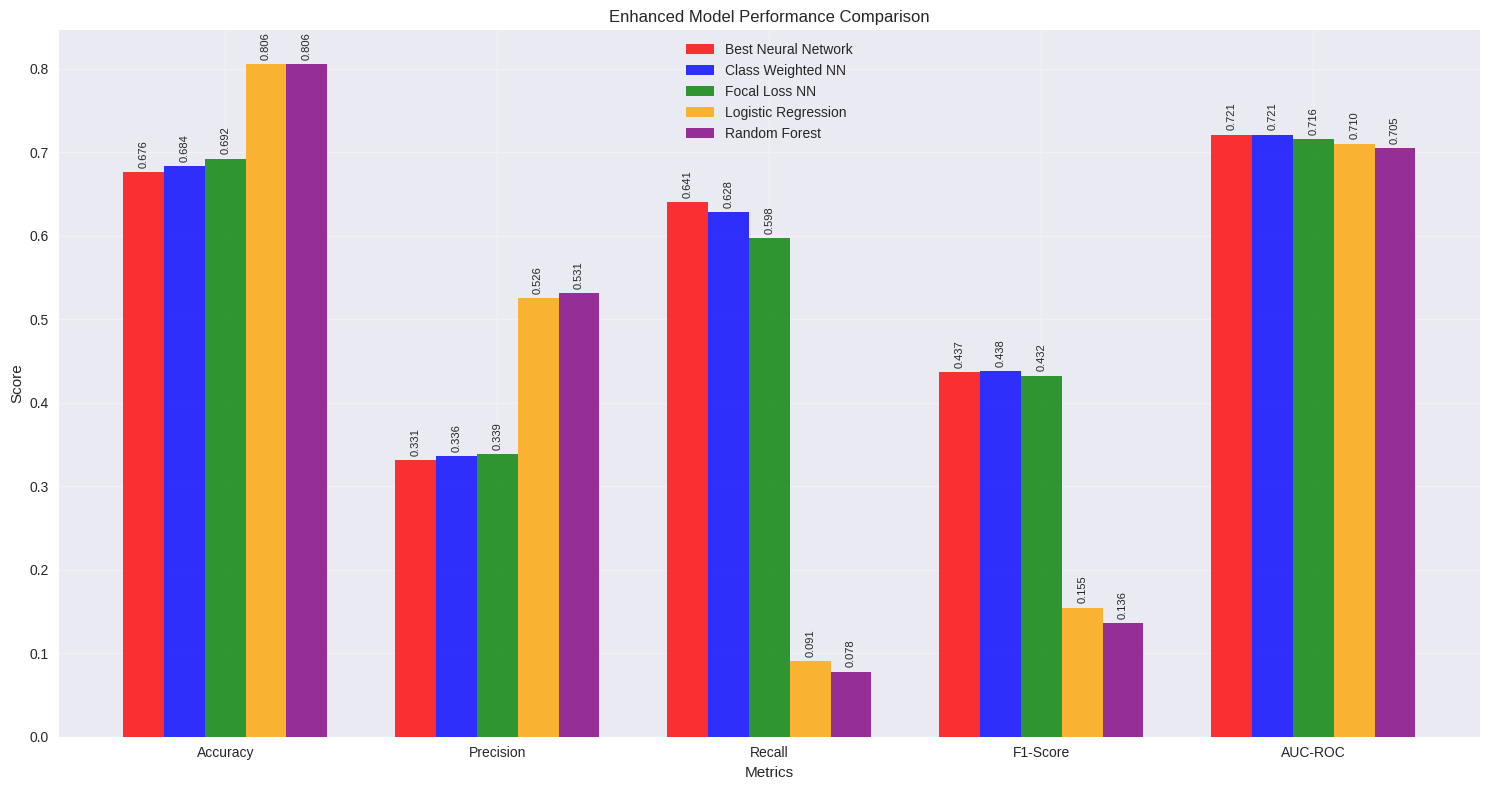

In [181]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(metrics))
width = 0.15

fig, ax = plt.subplots(figsize=(15, 8))
bars1 = ax.bar(x - 2*width, [accuracy, precision, recall, f1, auc_score],
               width, label='Best Neural Network', alpha=0.8, color='red')
bars2 = ax.bar(x - width, [metrics_weighted[0], metrics_weighted[1], metrics_weighted[2], metrics_weighted[3], metrics_weighted[4]],
               width, label='Class Weighted NN', alpha=0.8, color='blue')
bars3 = ax.bar(x, [metrics_focal[0], metrics_focal[1], metrics_focal[2], metrics_focal[3], metrics_focal[4]],
               width, label='Focal Loss NN', alpha=0.8, color='green')
bars4 = ax.bar(x + width, [lr_accuracy, lr_precision, lr_recall, lr_f1, lr_auc],
               width, label='Logistic Regression', alpha=0.8, color='orange')
bars5 = ax.bar(x + 2*width, [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc],
               width, label='Random Forest', alpha=0.8, color='purple')

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=8, rotation=90)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)
add_value_labels(bars5)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Enhanced Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


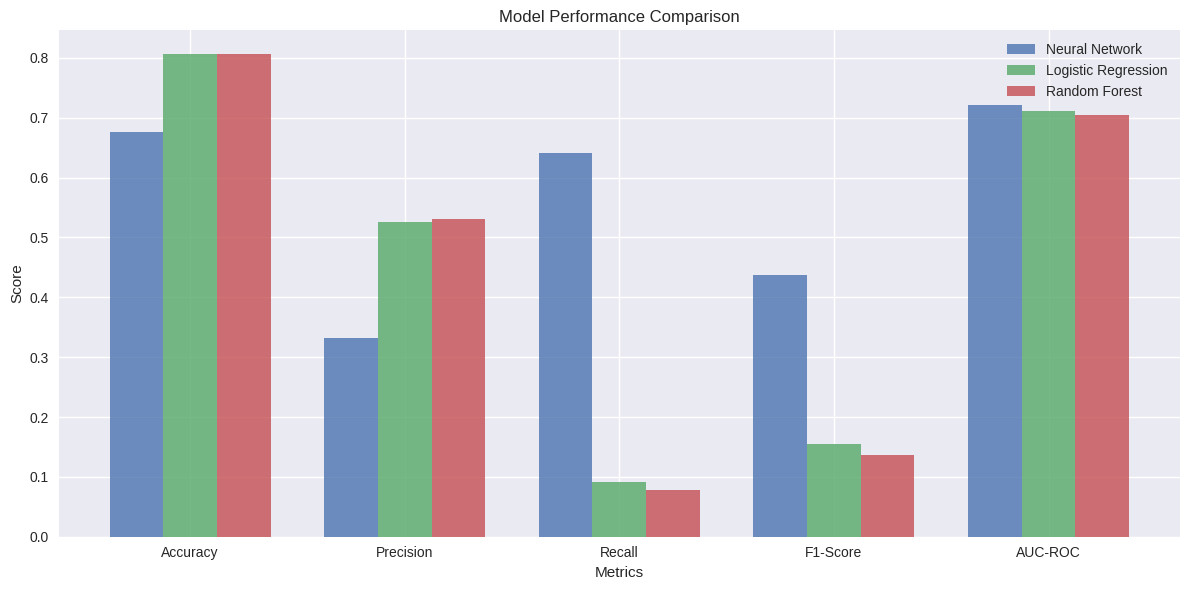

In [182]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, [accuracy, precision, recall, f1, auc_score],
               width, label='Neural Network', alpha=0.8)
bars2 = ax.bar(x, [lr_accuracy, lr_precision, lr_recall, lr_f1, lr_auc],
               width, label='Logistic Regression', alpha=0.8)
bars3 = ax.bar(x + width, [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc],
               width, label='Random Forest', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

# **Phase 7: Feature Importance & Business Insights**

### Feature Importance from Random Forest

Top 15 Most Important Features:
                  feature  importance
13                    dti    0.072625
25   loan_to_income_ratio    0.066462
17             revol_util    0.063791
2                int_rate    0.059696
26      total_credit_used    0.059019
16              revol_bal    0.058844
3             installment    0.057393
8              annual_inc    0.055959
18              total_acc    0.050858
10                issue_d    0.050781
5               sub_grade    0.046140
0               loan_amnt    0.044395
14               open_acc    0.042724
23  earliest_cr_line_year    0.039676
24  credit_history_length    0.039542


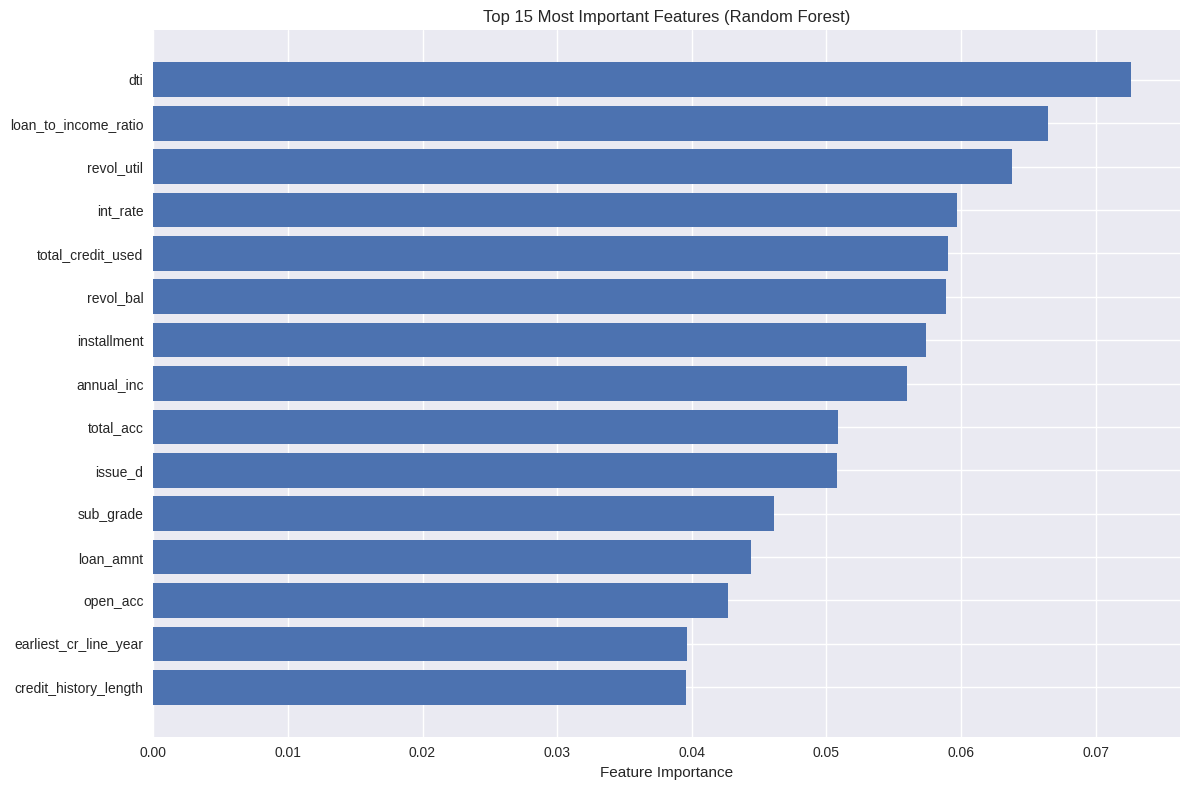

In [183]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Business Metrics

In [184]:
# Calculate business metrics
def calculate_business_metrics(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba > threshold).astype(int)

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Business metrics
    total_loans = len(y_true)
    approved_loans = np.sum(y_pred == 0)  # Predicted as good loans
    denied_loans = np.sum(y_pred == 1)    # Predicted as bad loans

    # Assuming average loan amount and loss given default
    avg_loan_amount = 15000  # Example average
    loss_given_default = 0.8  # 80% loss on defaulted loans

    # Calculate potential losses
    false_negatives_cost = fn * avg_loan_amount * loss_given_default
    opportunity_cost = fp * avg_loan_amount * 0.1  # 10% profit on good loans

    total_cost = false_negatives_cost + opportunity_cost

    return {
        'total_loans': total_loans,
        'approved_loans': approved_loans,
        'denied_loans': denied_loans,
        'false_negatives': fn,
        'false_positives': fp,
        'potential_loss': false_negatives_cost,
        'opportunity_cost': opportunity_cost,
        'total_cost': total_cost
    }

# Calculate business metrics for different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
business_metrics = []

for threshold in thresholds:
    metrics = calculate_business_metrics(y_test, y_pred_proba, threshold)
    metrics['threshold'] = threshold
    business_metrics.append(metrics)

business_df = pd.DataFrame(business_metrics)
print("\n Business Impact Analysis:")
print(business_df[['threshold', 'approved_loans', 'denied_loans', 'potential_loss', 'opportunity_cost', 'total_cost']].round(0))

# Find optimal threshold
optimal_threshold = business_df.loc[business_df['total_cost'].idxmin(), 'threshold']
print(f"\n Optimal threshold for business impact: {optimal_threshold}")


 Business Impact Analysis:
   threshold  approved_loans  denied_loans  potential_loss  opportunity_cost  \
0        0.0            8168         71038       3972000.0        83751000.0   
1        0.0           21793         57413      18276000.0        65101500.0   
2        0.0           35621         43585      38796000.0        46924500.0   
3        1.0           49171         30035      66984000.0        30123000.0   
4        1.0           62008         17198     104784000.0        15592500.0   

    total_cost  
0   87723000.0  
1   83377500.0  
2   85720500.0  
3   97107000.0  
4  120376500.0  

 Optimal threshold for business impact: 0.4


### Additional visualizations for presentation


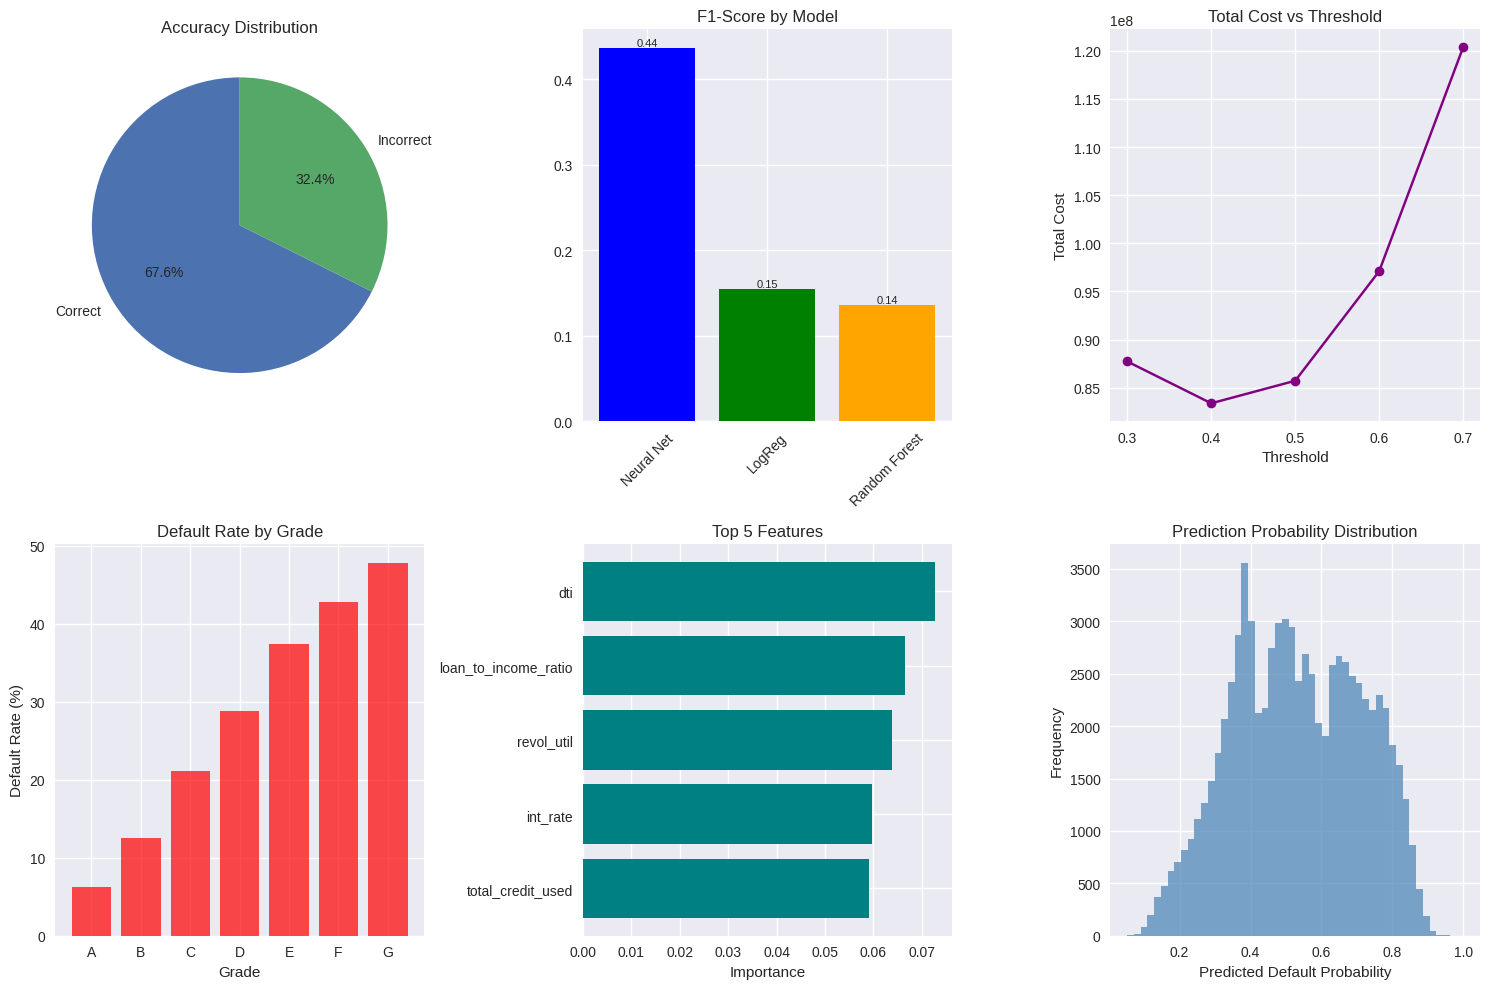

In [185]:
# Dashboard-style Visualization
plt.figure(figsize=(15, 10))

# 1. Accuracy Pie
plt.subplot(2, 3, 1)
plt.pie([accuracy, 1 - accuracy], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', startangle=90)
plt.title('Accuracy Distribution')

# 2. F1 Score Comparison
plt.subplot(2, 3, 2)
metrics_comparison = [f1, lr_f1, rf_f1]
models = ['Neural Net', 'LogReg', 'Random Forest']
bars = plt.bar(models, metrics_comparison, color=['blue', 'green', 'orange'])
plt.title('F1-Score by Model')
plt.xticks(rotation=45)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=8)

# 3. Business Cost vs Threshold
plt.subplot(2, 3, 3)
plt.plot(thresholds, [m['total_cost'] for m in business_metrics], 'o-', color='purple')
plt.title('Total Cost vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Total Cost')

# 4. Default Rate by Credit Grade
plt.subplot(2, 3, 4)
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
if all(grade in df['grade'].values for grade in grade_order):
    default_rates = df.groupby('grade')['loan_status'].apply(lambda x: (x == 'Charged Off').mean() * 100)
    default_rates = default_rates.reindex(grade_order)
    plt.bar(default_rates.index, default_rates.values, color='red', alpha=0.7)
    plt.title('Default Rate by Grade')
    plt.xlabel('Grade')
    plt.ylabel('Default Rate (%)')

# 5. Top 5 Features
plt.subplot(2, 3, 5)
top_5_features = feature_importance.head(5)
plt.barh(top_5_features['feature'], top_5_features['importance'], color='teal')
plt.title('Top 5 Features')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Important feature on top

# 6. Prediction Probability Distribution
plt.subplot(2, 3, 6)
plt.hist(y_pred_proba, bins=50, color='steelblue', alpha=0.7)
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Default Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



# **Phase 6 : Results Interpretation & Business Recommendations**

##  **Key Business Insights**

1. **Interest Rate & Risk** :
   Borrowers with **higher interest rates** exhibit a **stronger likelihood of default**. This aligns with the risk-based pricing strategy where higher risk borrowers are charged more, but also confirms their increased risk profile.

2. **Credit Grade Significance** :
   Loans with **lower credit grades (F, G)** show a **significantly higher default rate**, suggesting these segments require stricter approval criteria or additional scrutiny.

3. **Debt-to-Income (DTI) Ratio** :
   Applicants with a **higher DTI ratio** are more likely to default. A high DTI indicates financial stress and reduced ability to take on additional loans.

4. **Loan Amount Trends** :
   **Larger loan amounts** tend to correlate with higher default risk. This may be due to overleveraging or overestimation of repayment capacity.

 5. **Credit History Length** :
   Applicants with **longer credit histories** are generally **less risky**, indicating that credit maturity and historical responsibility reduce the likelihood of default.

---

## **Business Recommendations**

1. **Dynamic Interest Rate Pricing** :
   Adjust loan interest rates dynamically based on **predicted default probabilities**, ensuring pricing better reflects individual risk levels.

2. **Enhanced Documentation for High-Risk Applicants** :
   Require **additional verification** or income proof for applicants flagged as **medium to high risk** by the model to reduce approval errors.

3. **Loan Amount Caps Based on Risk Profile** :
   Introduce **risk-tiered loan limits**, restricting the maximum loan size available to high-risk individuals.

4. **Model Monitoring & Continuous Training** :
   **Retrain the model regularly** with updated loan data to adapt to changing borrower behaviors and economic conditions.

5. **Threshold A/B Testing** :
   Conduct **A/B testing with varying default thresholds** to determine the best balance between approval volume and risk mitigation.


---
